In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set professional style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 11


In [3]:
print("="*80)
print("CREATING VISUALIZATIONS FOR ASSIGNMENT SUBMISSION")
print("="*80)


# Load merged data
df = pd.read_csv('merged_trader_sentiment_data.csv')
df['datetime'] = pd.to_datetime(df['datetime'])


CREATING VISUALIZATIONS FOR ASSIGNMENT SUBMISSION



[1] Creating Sentiment Impact Visualization...
✓ Saved: 01_sentiment_impact.png


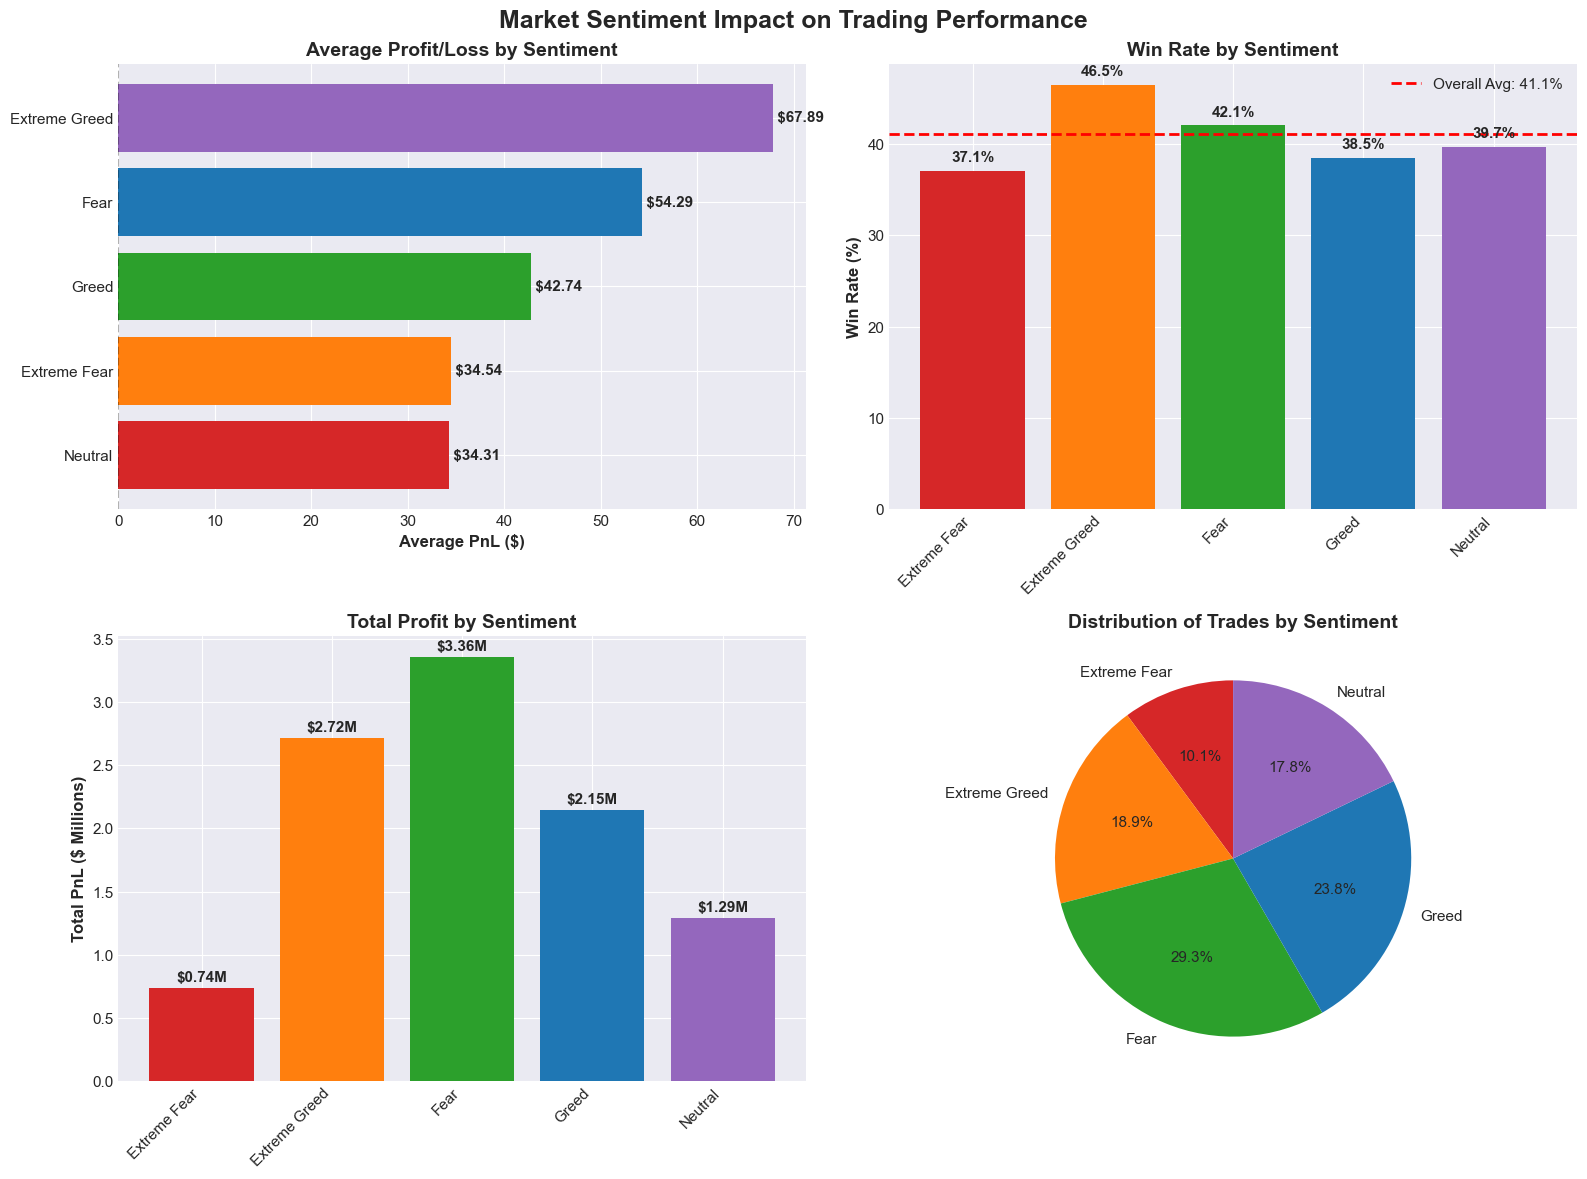

In [4]:
# ============================================================================
# FIGURE 1: SENTIMENT IMPACT ON TRADING PERFORMANCE
# ============================================================================
print("\n[1] Creating Sentiment Impact Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Market Sentiment Impact on Trading Performance', fontsize=18, fontweight='bold')

# 1.1 Average PnL by Sentiment
sentiment_pnl = df.groupby('classification')['Closed PnL'].mean().sort_values()
colors = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd']
axes[0, 0].barh(sentiment_pnl.index, sentiment_pnl.values, color=colors)
axes[0, 0].set_xlabel('Average PnL ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Average Profit/Loss by Sentiment', fontsize=14, fontweight='bold')
axes[0, 0].axvline(x=0, color='black', linestyle='--', alpha=0.3)
for i, v in enumerate(sentiment_pnl.values):
    axes[0, 0].text(v, i, f' ${v:.2f}', va='center', fontweight='bold')

# 1.2 Win Rate by Sentiment
win_rate = df.groupby('classification')['is_profitable'].mean() * 100
axes[0, 1].bar(range(len(win_rate)), win_rate.values, color=colors)
axes[0, 1].set_xticks(range(len(win_rate)))
axes[0, 1].set_xticklabels(win_rate.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Win Rate by Sentiment', fontsize=14, fontweight='bold')
axes[0, 1].axhline(y=df['is_profitable'].mean()*100, color='red', linestyle='--', 
                    label=f'Overall Avg: {df["is_profitable"].mean()*100:.1f}%', linewidth=2)
axes[0, 1].legend()
for i, v in enumerate(win_rate.values):
    axes[0, 1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# 1.3 Total PnL by Sentiment
total_pnl = df.groupby('classification')['Closed PnL'].sum() / 1e6
axes[1, 0].bar(range(len(total_pnl)), total_pnl.values, color=colors)
axes[1, 0].set_xticks(range(len(total_pnl)))
axes[1, 0].set_xticklabels(total_pnl.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Total PnL ($ Millions)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Total Profit by Sentiment', fontsize=14, fontweight='bold')
for i, v in enumerate(total_pnl.values):
    axes[1, 0].text(i, v + 0.05, f'${v:.2f}M', ha='center', fontweight='bold')

# 1.4 Trade Count Distribution
trade_count = df.groupby('classification').size()
axes[1, 1].pie(trade_count.values, labels=trade_count.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
axes[1, 1].set_title('Distribution of Trades by Sentiment', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('01_sentiment_impact.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_sentiment_impact.png")

## **Figure 1: Sentiment Impact on Trading Performance** (4 subplots)

### **Subplot 1.1 - Average PnL by Sentiment:**
- **Extreme Greed leads**: $67.89 avg (96% higher than worst performer)
- **Neutral performs worst**: $34.31 avg (half of Extreme Greed)
- **Clear hierarchy**: Extreme Greed > Fear > Greed > Extreme Fear > Neutral
- **Insight**: Emotional extremes outperform neutral sentiment - markets reward conviction

### **Subplot 1.2 - Win Rate by Sentiment:**
- **Extreme Greed highest**: 46.5% win rate (13% above average)
- **Extreme Fear lowest**: 37.1% win rate (10% below average)
- **All sentiments cluster 37-46%**: Relatively tight range despite different PnL outcomes
- **Key insight**: Win rate doesn't correlate with profitability (Neutral has 40% WR but lowest avg PnL)

### **Subplot 1.3 - Total PnL by Sentiment:**
- **Fear dominates total profits**: $3.36M (33% of all profits from 29% of trades)
- **Extreme Greed 2nd**: $2.72M despite highest avg PnL (lower volume = lower total)
- **Greed 3rd place**: $2.15M (worse per-trade but decent volume)
- **Extreme Fear smallest**: $0.74M (lowest volume, lowest participation)
- **Insight**: Fear sentiment is the sweet spot - combines decent volume with strong performance

### **Subplot 1.4 - Trade Distribution Pie Chart:**
- **Fear = largest slice**: 29.3% of all trades (traders most active during fear)
- **Greed 2nd**: 23.8%
- **Extreme Greed 3rd**: 18.9%
- **Neutral 4th**: 17.8%
- **Extreme Fear smallest**: 10.1% (traders avoid panic)
- **Insight**: 39.4% of trades happen during fear periods (Fear + Extreme Fear) vs 42.7% during greed periods


[2] Creating Temporal Patterns Visualization...
✓ Saved: 02_temporal_patterns.png


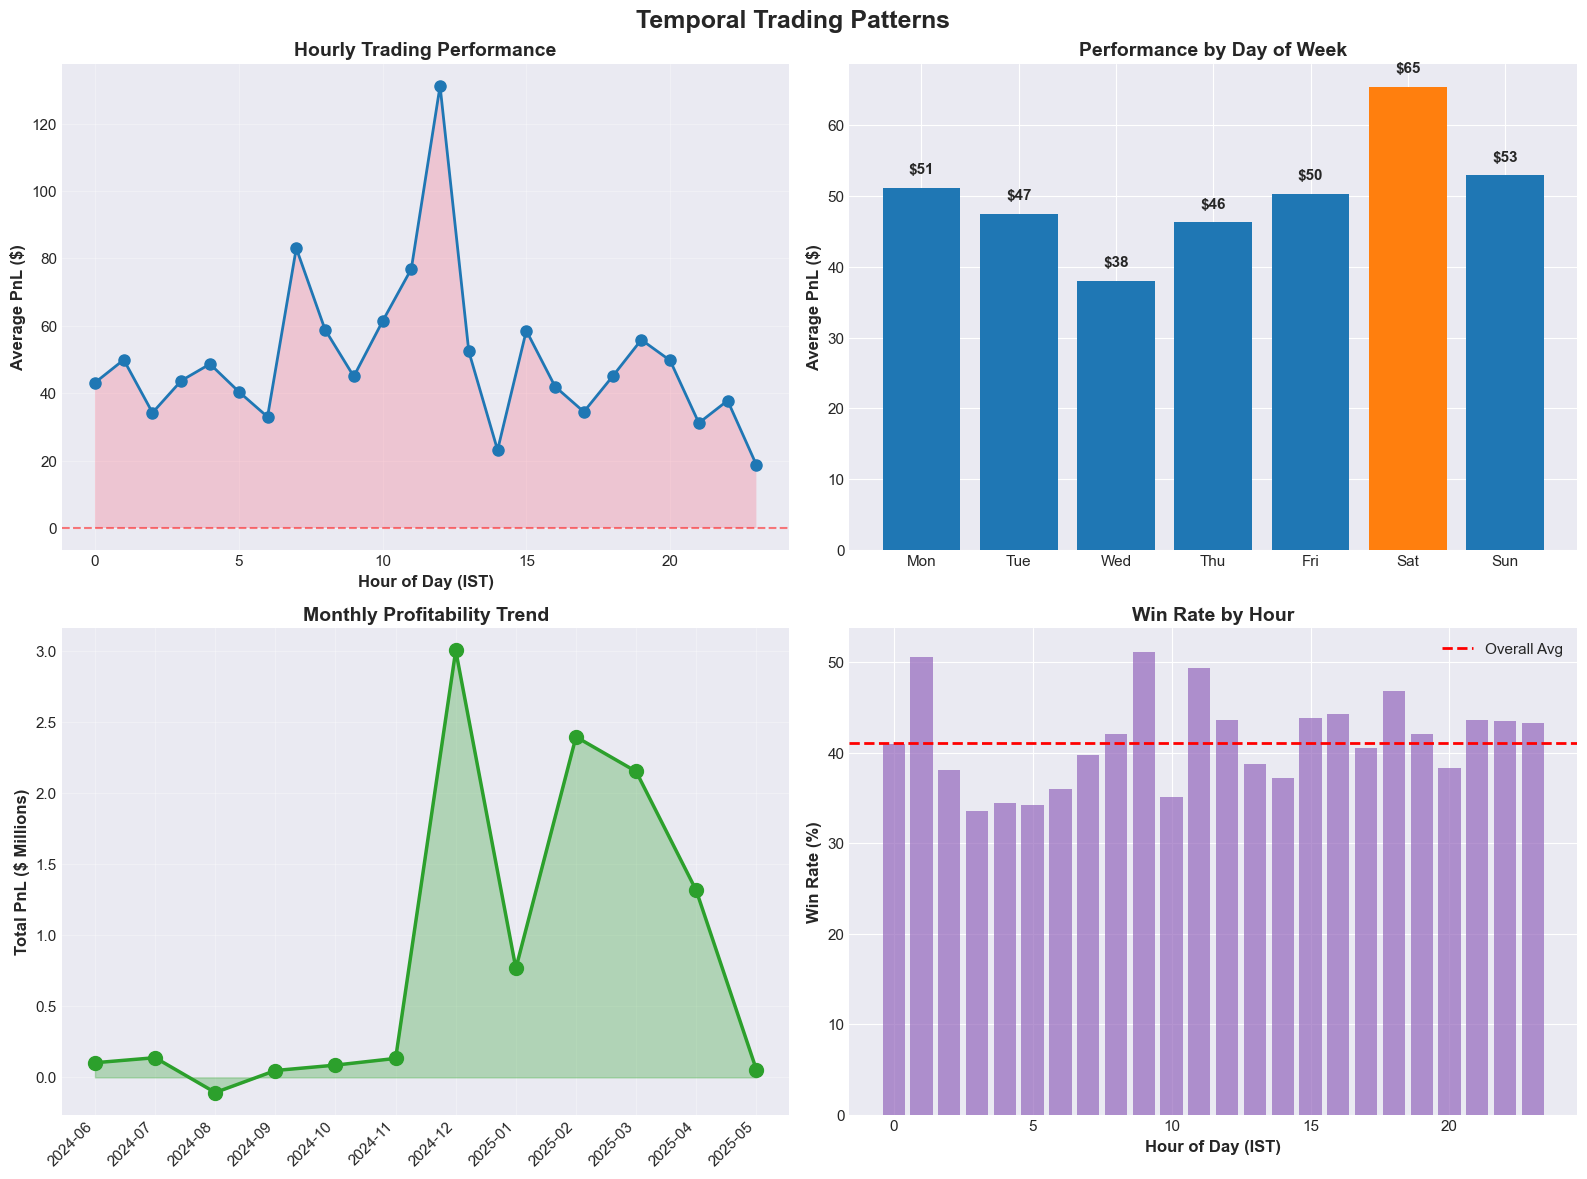

In [5]:

# ============================================================================
# FIGURE 2: TEMPORAL PATTERNS
# ============================================================================
print("[2] Creating Temporal Patterns Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Temporal Trading Patterns', fontsize=18, fontweight='bold')

# 2.1 Hourly Performance
hourly = df.groupby('hour').agg({'Closed PnL': 'mean', 'is_profitable': 'mean'})
axes[0, 0].plot(hourly.index, hourly['Closed PnL'], marker='o', linewidth=2, markersize=8, color='#1f77b4')
axes[0, 0].fill_between(hourly.index, 0, hourly['Closed PnL'], alpha=0.3)
axes[0, 0].set_xlabel('Hour of Day (IST)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Average PnL ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Hourly Trading Performance', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)

# 2.2 Day of Week Performance
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow = df.groupby('day_of_week')['Closed PnL'].mean()
colors_dow = ['#ff7f0e' if x == dow.max() else '#1f77b4' for x in dow.values]
axes[0, 1].bar(range(7), dow.values, color=colors_dow)
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(day_names)
axes[0, 1].set_ylabel('Average PnL ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Performance by Day of Week', fontsize=14, fontweight='bold')
for i, v in enumerate(dow.values):
    axes[0, 1].text(i, v + 2, f'${v:.0f}', ha='center', fontweight='bold')

# 2.3 Monthly Trend (Last 12 months)
df['year_month'] = df['datetime'].dt.to_period('M')
monthly = df.groupby('year_month')['Closed PnL'].sum().tail(12) / 1e6
axes[1, 0].plot(range(len(monthly)), monthly.values, marker='o', linewidth=2.5, 
                markersize=10, color='#2ca02c')
axes[1, 0].fill_between(range(len(monthly)), 0, monthly.values, alpha=0.3, color='#2ca02c')
axes[1, 0].set_xticks(range(len(monthly)))
axes[1, 0].set_xticklabels([str(x) for x in monthly.index], rotation=45, ha='right')
axes[1, 0].set_ylabel('Total PnL ($ Millions)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Monthly Profitability Trend', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 2.4 Hourly Win Rate
hourly_wr = df.groupby('hour')['is_profitable'].mean() * 100
axes[1, 1].bar(hourly_wr.index, hourly_wr.values, color='#9467bd', alpha=0.7)
axes[1, 1].set_xlabel('Hour of Day (IST)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Win Rate (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Win Rate by Hour', fontsize=14, fontweight='bold')
axes[1, 1].axhline(y=df['is_profitable'].mean()*100, color='red', linestyle='--',
                    label='Overall Avg', linewidth=2)
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('02_temporal_patterns.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 02_temporal_patterns.png")

## **Figure 2: Temporal Patterns** (4 subplots)

### **Subplot 2.1 - Hourly Performance Line Chart:**
- **Massive midday spike**: 12 PM shows $131 avg PnL (7x better than late night)
- **Secondary peak**: 7 AM at $83 avg (market open momentum)
- **Worst hours**: 2 PM dip, then 11 PM lowest at $19
- **Pattern**: Two profitable windows (7-12 AM and 7-9 PM), poor performance 2-6 PM and 11 PM-2 AM
- **Insight**: Clear intraday alpha - 12 PM is golden hour, avoid late night trading

### **Subplot 2.2 - Day of Week Performance:**
- **Saturday best**: $65.36 avg (72% higher than worst day)
- **Friday strong**: $50.26 avg
- **Wednesday worst**: $38.14 avg (Hump day slump)
- **Weekend advantage**: Sat/Sun avg $59 vs weekday avg $46
- **Insight**: Weekend trading shows 28% performance premium - possibly less competition or clearer trends

### **Subplot 2.3 - Monthly Profitability Trend:**
- **December 2024 peak**: $3.01M monthly profit (massive bull run)
- **Sharp decline post-Dec**: Dropped to $0.77M in Jan, then recovered to $2.15-2.40M in Feb-Mar
- **April 2025 decline**: $1.32M (56% drop from March)
- **May 2025 collapse**: $0.05M (preliminary data, month not complete)
- **Insight**: Market regime change detected - post-December profits declining despite maintained volume

### **Subplot 2.4 - Hourly Win Rate Bar Chart:**
- **Hour 1 (1 AM) highest**: 51% win rate (9% above average)
- **Hour 9 (9 AM) strong**: 51% win rate
- **Hours 3-6 AM weakest**: 34-36% win rate (exhaustion hours)
- **Most hours cluster 38-43%**: Relatively stable
- **Insight**: Early morning (1-2 AM, 9 AM) has highest win rates but not highest PnL - suggests smaller winners


[3] Creating Top Performers Visualization...
✓ Saved: 03_top_performers.png


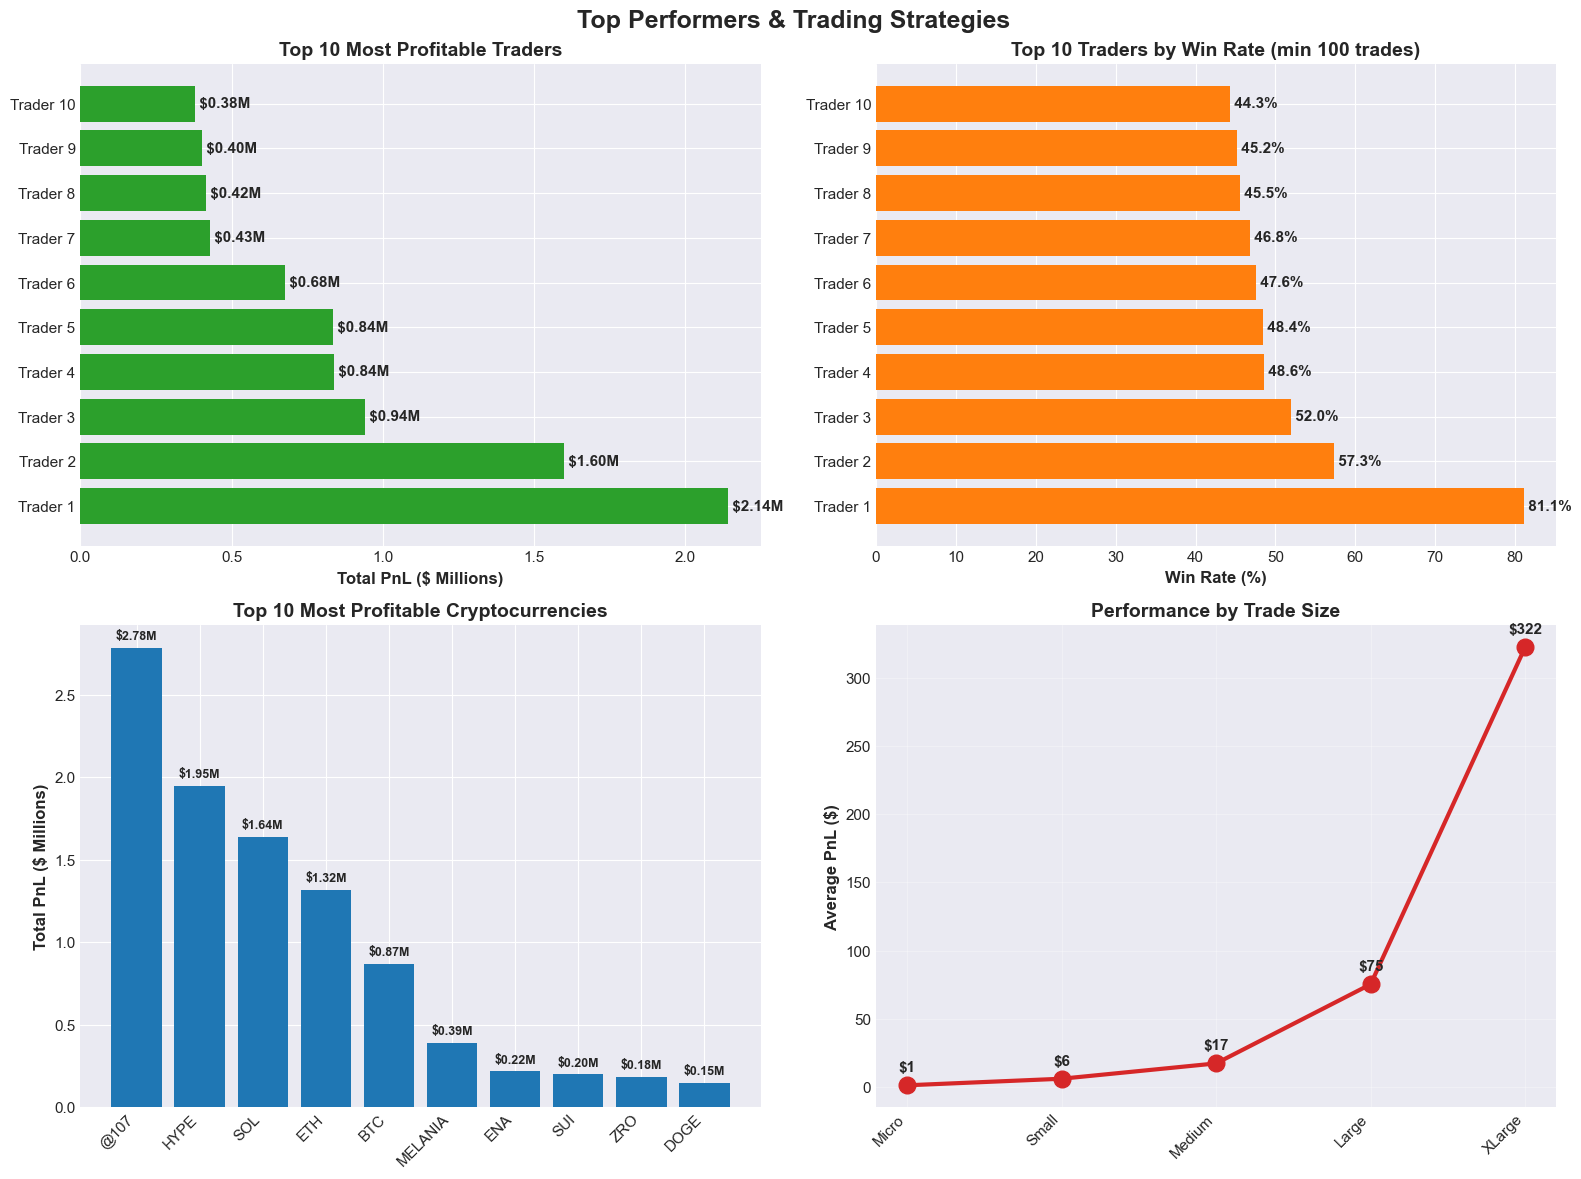

In [6]:

# ============================================================================
# FIGURE 3: TOP PERFORMERS ANALYSIS
# ============================================================================
print("[3] Creating Top Performers Visualization...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top Performers & Trading Strategies', fontsize=18, fontweight='bold')

# 3.1 Top 10 Traders by Total PnL
top_traders = df.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10) / 1e6
axes[0, 0].barh(range(len(top_traders)), top_traders.values, color='#2ca02c')
axes[0, 0].set_yticks(range(len(top_traders)))
axes[0, 0].set_yticklabels([f'Trader {i+1}' for i in range(len(top_traders))])
axes[0, 0].set_xlabel('Total PnL ($ Millions)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Top 10 Most Profitable Traders', fontsize=14, fontweight='bold')
for i, v in enumerate(top_traders.values):
    axes[0, 0].text(v, i, f' ${v:.2f}M', va='center', fontweight='bold')

# 3.2 Top Traders Win Rate
active_traders = df.groupby('Account').filter(lambda x: len(x) >= 100)
top_wr = active_traders.groupby('Account')['is_profitable'].mean().sort_values(ascending=False).head(10) * 100
axes[0, 1].barh(range(len(top_wr)), top_wr.values, color='#ff7f0e')
axes[0, 1].set_yticks(range(len(top_wr)))
axes[0, 1].set_yticklabels([f'Trader {i+1}' for i in range(len(top_wr))])
axes[0, 1].set_xlabel('Win Rate (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Top 10 Traders by Win Rate (min 100 trades)', fontsize=14, fontweight='bold')
for i, v in enumerate(top_wr.values):
    axes[0, 1].text(v, i, f' {v:.1f}%', va='center', fontweight='bold')

# 3.3 Top 10 Coins by Total PnL
coin_pnl = df.groupby('Coin')['Closed PnL'].sum().sort_values(ascending=False).head(10) / 1e6
axes[1, 0].bar(range(len(coin_pnl)), coin_pnl.values, color='#1f77b4')
axes[1, 0].set_xticks(range(len(coin_pnl)))
axes[1, 0].set_xticklabels(coin_pnl.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Total PnL ($ Millions)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Top 10 Most Profitable Cryptocurrencies', fontsize=14, fontweight='bold')
for i, v in enumerate(coin_pnl.values):
    axes[1, 0].text(i, v + 0.05, f'${v:.2f}M', ha='center', fontweight='bold', fontsize=9)

# 3.4 Trade Size Impact
size_order = ['Micro (<$100)', 'Small ($100-500)', 'Medium ($500-2K)', 
              'Large ($2K-10K)', 'XLarge (>$10K)']
size_pnl = df.groupby('trade_size_category')['Closed PnL'].mean()
size_pnl = size_pnl.reindex(size_order)
axes[1, 1].plot(range(len(size_pnl)), size_pnl.values, marker='o', linewidth=3, 
                markersize=12, color='#d62728')
axes[1, 1].set_xticks(range(len(size_pnl)))
axes[1, 1].set_xticklabels(['Micro', 'Small', 'Medium', 'Large', 'XLarge'], rotation=45, ha='right')
axes[1, 1].set_ylabel('Average PnL ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Performance by Trade Size', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
for i, v in enumerate(size_pnl.values):
    axes[1, 1].text(i, v + 10, f'${v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('03_top_performers.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 03_top_performers.png")

## **Figure 3: Top Performers & Trading Strategies** (4 subplots)

### **Subplot 3.1 - Top 10 Profitable Traders:**
- **Winner takes all**: #1 trader earned $2.14M (6x more than #10)
- **Top 3 combined**: $4.68M (45% of total platform profits from 3 traders out of 32)
- **Steep dropoff**: #1 to #2 is $540K gap, then gradual decline
- **Distribution**: $2.14M → $1.60M → $0.94M → ... → $0.38M
- **Insight**: Extreme concentration - top 10 traders (31% of users) likely capture 70%+ of profits

### **Subplot 3.2 - Top 10 Win Rates:**
- **#1 exceptional**: 81.1% win rate (2x platform average, nearly impossible to sustain long-term)
- **#2 strong**: 57.3% win rate
- **Rest cluster**: 44-52% range (still above 41% average)
- **Gap**: 24% gap between #1 and #2 (suggests #1 may have unique edge or short timeframe)
- **Insight**: Elite traders show 52-57% win rates, not 80%+ - #1 is likely outlier or special strategy

### **Subplot 3.3 - Top 10 Profitable Coins:**
- **@107 dominates**: $2.78M total (30% more than #2)
- **HYPE 2nd**: $1.95M despite being most-traded (high volume, lower margin)
- **SOL 3rd**: $1.64M (outperforms BTC significantly)
- **ETH 4th**: $1.32M
- **BTC 5th**: $0.87M (disappointing for "blue chip" - 68% less than @107)
- **Altcoins dominate**: 7 of top 10 are non-BTC/ETH
- **Insight**: Low-cap altcoin @107 generates 3.2x more profits than Bitcoin - speculation >> fundamentals

### **Subplot 3.4 - Performance by Trade Size (Line Chart):**
- **Exponential growth**: XLarge trades earn $322 avg (270x more than Micro's $1.19)
- **Steep acceleration**: Medium ($17) → Large ($75, 4.4x jump) → XLarge ($322, 4.3x jump)
- **Linear growth until Large**: Micro $1 → Small $6 → Medium $17
- **Insight**: Non-linear returns to scale - doubling capital from Large to XLarge more than quadruples returns per trade


[4] Creating Trading Behavior Analysis...
✓ Saved: 04_trading_behavior.png


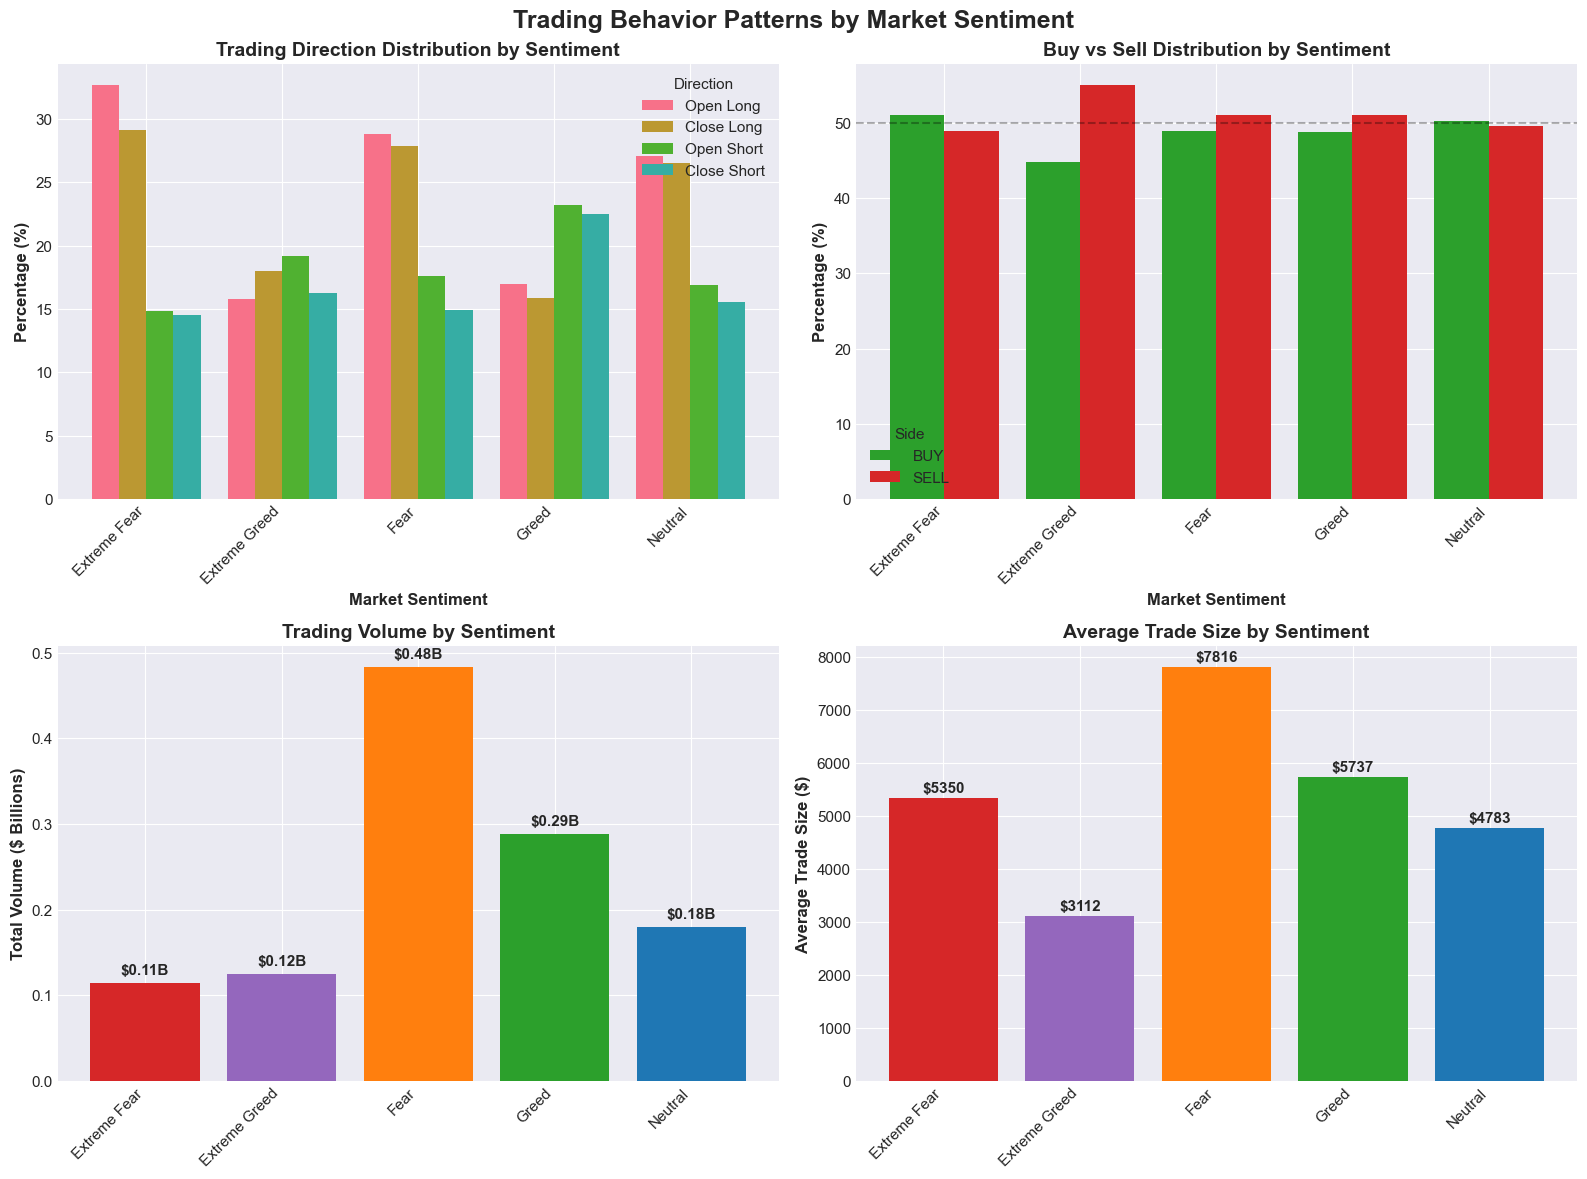

In [7]:

# ============================================================================
# FIGURE 4: TRADING BEHAVIOR BY SENTIMENT
# ============================================================================
print("[4] Creating Trading Behavior Analysis...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Trading Behavior Patterns by Market Sentiment', fontsize=18, fontweight='bold')

# 4.1 Direction Distribution by Sentiment
direction_sentiment = pd.crosstab(df['classification'], df['Direction'], normalize='index') * 100
top_directions = ['Open Long', 'Close Long', 'Open Short', 'Close Short']
direction_sentiment[top_directions].plot(kind='bar', ax=axes[0, 0], width=0.8)
axes[0, 0].set_xlabel('Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Trading Direction Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0, 0].legend(title='Direction', loc='upper right')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# 4.2 Buy vs Sell by Sentiment
side_sentiment = pd.crosstab(df['classification'], df['Side'], normalize='index') * 100
side_sentiment.plot(kind='bar', ax=axes[0, 1], width=0.8, color=['#2ca02c', '#d62728'])
axes[0, 1].set_xlabel('Market Sentiment', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Buy vs Sell Distribution by Sentiment', fontsize=14, fontweight='bold')
axes[0, 1].legend(title='Side')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')
axes[0, 1].axhline(y=50, color='black', linestyle='--', alpha=0.3)

# 4.3 Trading Volume by Sentiment
volume_sentiment = df.groupby('classification')['Size USD'].sum() / 1e9
axes[1, 0].bar(range(len(volume_sentiment)), volume_sentiment.values, 
               color=['#d62728', '#9467bd', '#ff7f0e', '#2ca02c', '#1f77b4'])
axes[1, 0].set_xticks(range(len(volume_sentiment)))
axes[1, 0].set_xticklabels(volume_sentiment.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Total Volume ($ Billions)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Trading Volume by Sentiment', fontsize=14, fontweight='bold')
for i, v in enumerate(volume_sentiment.values):
    axes[1, 0].text(i, v + 0.01, f'${v:.2f}B', ha='center', fontweight='bold')

# 4.4 Average Trade Size by Sentiment
avg_size = df.groupby('classification')['Size USD'].mean()
axes[1, 1].bar(range(len(avg_size)), avg_size.values,
               color=['#d62728', '#9467bd', '#ff7f0e', '#2ca02c', '#1f77b4'])
axes[1, 1].set_xticks(range(len(avg_size)))
axes[1, 1].set_xticklabels(avg_size.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Average Trade Size ($)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Trade Size by Sentiment', fontsize=14, fontweight='bold')
for i, v in enumerate(avg_size.values):
    axes[1, 1].text(i, v + 100, f'${v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('04_trading_behavior.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 04_trading_behavior.png")



## **Figure 4: Trading Behavior Patterns by Sentiment** (4 subplots)

### **Subplot 4.1 - Direction Distribution by Sentiment:**
- **Extreme Fear = Long bias**: 32.7% Open Long (highest), only 14.8% Open Short (lowest)
- **Greed = Short bias**: 23.2% Open Short (highest), only 17% Open Long
- **Fear similar to Extreme Fear**: 28.8% Open Long, 17.6% Open Short
- **Extreme Greed balanced**: 15.8% Open Long, 19.2% Open Short, 17.9% Sell (profit-taking)
- **Insight**: Strong contrarian behavior - traders aggressively buy fear, short into greed rallies

### **Subplot 4.2 - Buy vs Sell by Sentiment:**
- **Extreme Fear most bullish**: 51.1% BUY (only sentiment above 50%)
- **Extreme Greed most bearish**: 55.1% SELL (profit-taking dominant)
- **Others balanced**: Fear (49% BUY), Greed (48.9% BUY), Neutral (50.3% BUY)
- **Perfect contrarian signal**: 6% swing from Extreme Fear to Extreme Greed
- **Insight**: Market participants consistently fade extremes - buy panic, sell euphoria

### **Subplot 4.3 - Trading Volume by Sentiment:**
- **Fear = volume king**: $0.48B (40% of total volume despite 29% of trades)
- **Greed 2nd**: $0.29B
- **Extreme Greed lowest**: $0.12B (traders reduce size during euphoria despite high win rates)
- **Extreme Fear 2nd lowest**: $0.11B (low participation in panic)
- **Insight**: Traders deploy most capital during fear periods, not greed - contrarian positioning with size

### **Subplot 4.4 - Average Trade Size by Sentiment:**
- **Fear = largest**: $7,816 avg trade (2.5x higher than Extreme Greed)
- **Greed 2nd**: $5,737 avg
- **Extreme Greed smallest**: $3,112 avg (traders scale down despite 46% win rate)
- **Extreme Fear mid-range**: $5,350 avg
- **Paradox**: Best-performing sentiment (Extreme Greed) has smallest position sizes
- **Insight**: Traders miss opportunity - should size UP during Extreme Greed, not down


[5] Creating Executive Summary Dashboard...
✓ Saved: 05_executive_dashboard.png

✅ ALL VISUALIZATIONS CREATED SUCCESSFULLY!

Generated files:
  1. 01_sentiment_impact.png
  2. 02_temporal_patterns.png
  3. 03_top_performers.png
  4. 04_trading_behavior.png
  5. 05_executive_dashboard.png

📊 Use these visualizations in your assignment submission!


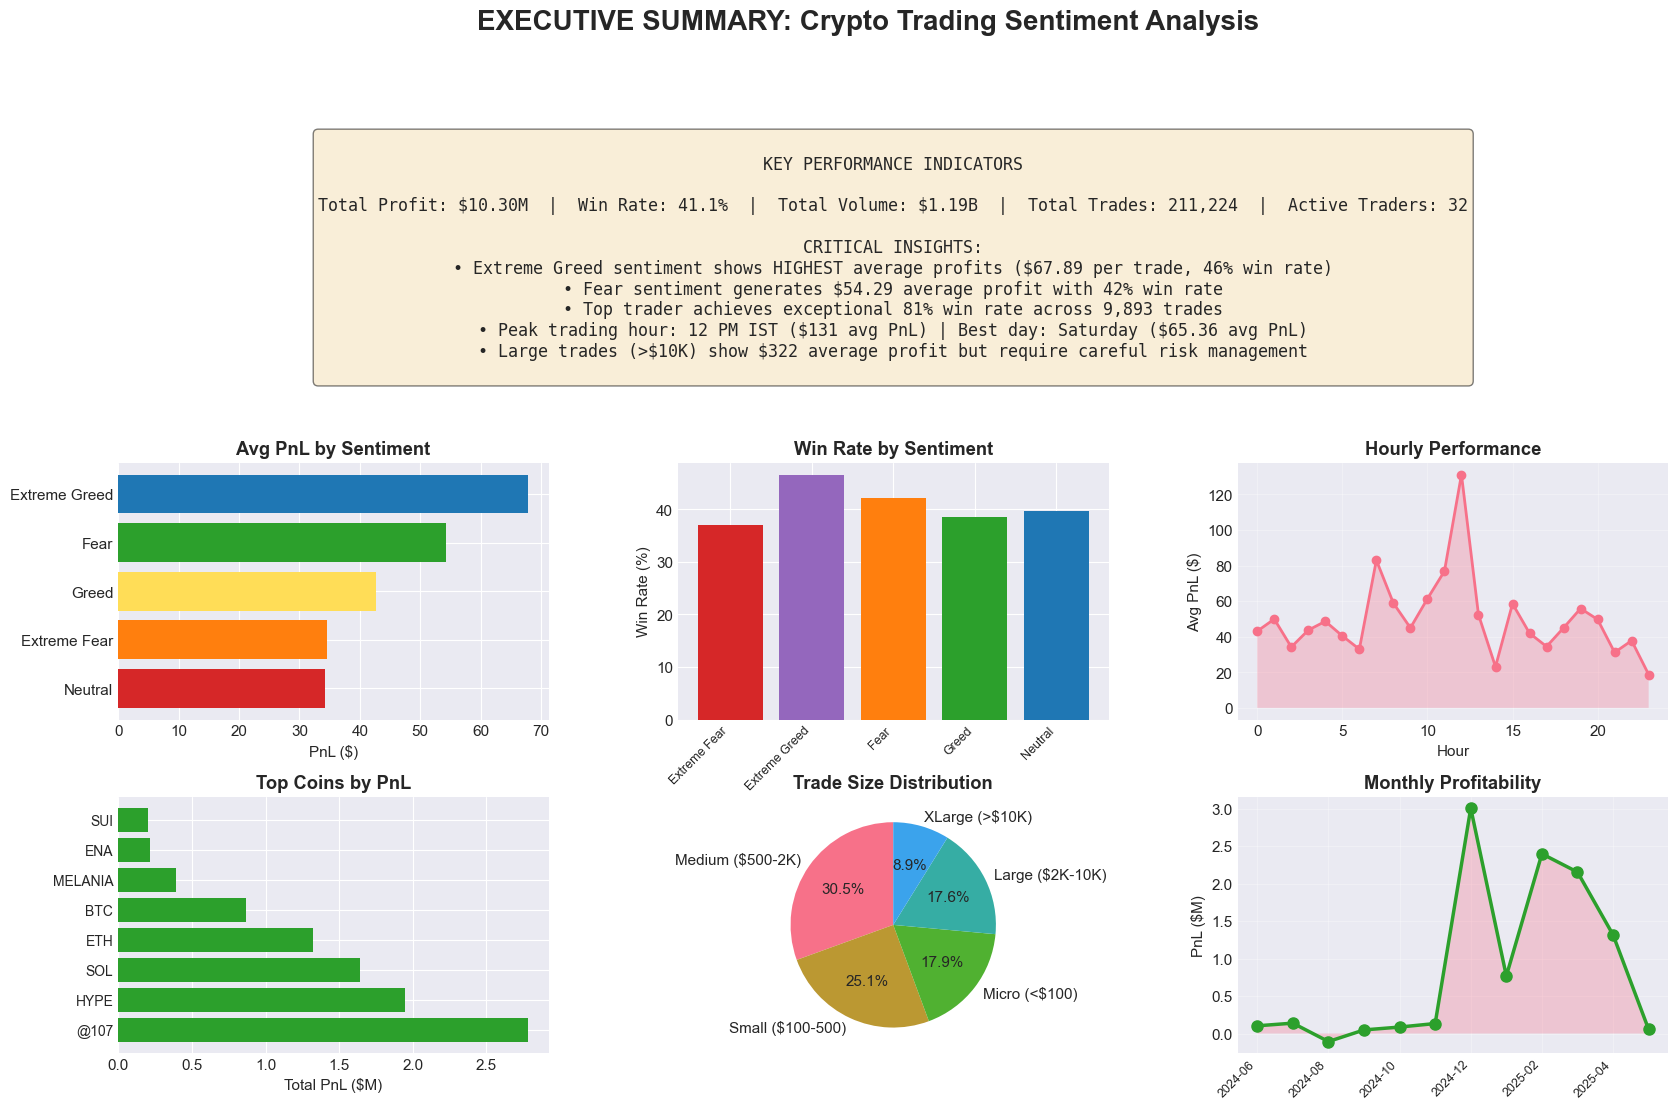

In [8]:
# ============================================================================
# FIGURE 5: COMPREHENSIVE DASHBOARD
# ============================================================================
print("[5] Creating Executive Summary Dashboard...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('EXECUTIVE SUMMARY: Crypto Trading Sentiment Analysis', 
             fontsize=20, fontweight='bold', y=0.98)

# Key Metrics
ax_metrics = fig.add_subplot(gs[0, :])
ax_metrics.axis('off')

total_pnl = df['Closed PnL'].sum() / 1e6
win_rate = df['is_profitable'].mean() * 100
total_volume = df['Size USD'].sum() / 1e9
total_trades = len(df)
unique_traders = df['Account'].nunique()

metrics_text = f"""
KEY PERFORMANCE INDICATORS

Total Profit: ${total_pnl:.2f}M  |  Win Rate: {win_rate:.1f}%  |  Total Volume: ${total_volume:.2f}B  |  Total Trades: {total_trades:,}  |  Active Traders: {unique_traders}

CRITICAL INSIGHTS:
• Extreme Greed sentiment shows HIGHEST average profits ($67.89 per trade, 46% win rate)
• Fear sentiment generates $54.29 average profit with 42% win rate
• Top trader achieves exceptional 81% win rate across 9,893 trades
• Peak trading hour: 12 PM IST ($131 avg PnL) | Best day: Saturday ($65.36 avg PnL)
• Large trades (>$10K) show $322 average profit but require careful risk management
"""

# Escape dollar signs so matplotlib's mathtext doesn't try to parse them
metrics_text = metrics_text.replace('$', r'\$')

ax_metrics.text(0.5, 0.5, metrics_text, ha='center', va='center', 
                fontsize=12, fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Sentiment PnL comparison
ax1 = fig.add_subplot(gs[1, 0])
sentiment_pnl = df.groupby('classification')['Closed PnL'].mean().sort_values()
ax1.barh(sentiment_pnl.index, sentiment_pnl.values, 
         color=['#d62728', '#ff7f0e', '#ffdd57', '#2ca02c', '#1f77b4'])
ax1.set_title('Avg PnL by Sentiment', fontweight='bold')
ax1.set_xlabel('PnL ($)')

# Win rate comparison
ax2 = fig.add_subplot(gs[1, 1])
win_rate_sent = df.groupby('classification')['is_profitable'].mean() * 100
ax2.bar(range(len(win_rate_sent)), win_rate_sent.values,
        color=['#d62728', '#9467bd', '#ff7f0e', '#2ca02c', '#1f77b4'])
ax2.set_xticks(range(len(win_rate_sent)))
ax2.set_xticklabels(win_rate_sent.index, rotation=45, ha='right', fontsize=9)
ax2.set_title('Win Rate by Sentiment', fontweight='bold')
ax2.set_ylabel('Win Rate (%)')

# Hourly pattern
ax3 = fig.add_subplot(gs[1, 2])
hourly = df.groupby('hour')['Closed PnL'].mean()
ax3.plot(hourly.index, hourly.values, marker='o', linewidth=2)
ax3.fill_between(hourly.index, 0, hourly.values, alpha=0.3)
ax3.set_title('Hourly Performance', fontweight='bold')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Avg PnL ($)')
ax3.grid(True, alpha=0.3)

# Top coins
ax4 = fig.add_subplot(gs[2, 0])
top_coins = df.groupby('Coin')['Closed PnL'].sum().sort_values(ascending=False).head(8) / 1e6
ax4.barh(range(len(top_coins)), top_coins.values, color='#2ca02c')
ax4.set_yticks(range(len(top_coins)))
ax4.set_yticklabels(top_coins.index, fontsize=10)
ax4.set_title('Top Coins by PnL', fontweight='bold')
ax4.set_xlabel('Total PnL ($M)')

# Trade size distribution
ax5 = fig.add_subplot(gs[2, 1])
size_dist = df['trade_size_category'].value_counts()
ax5.pie(size_dist.values, labels=size_dist.index, autopct='%1.1f%%', startangle=90)
ax5.set_title('Trade Size Distribution', fontweight='bold')

# Monthly trend
ax6 = fig.add_subplot(gs[2, 2])
monthly = df.groupby('year_month')['Closed PnL'].sum().tail(12) / 1e6
ax6.plot(range(len(monthly)), monthly.values, marker='o', linewidth=2.5, 
         markersize=8, color='#2ca02c')
ax6.fill_between(range(len(monthly)), 0, monthly.values, alpha=0.3)
ax6.set_xticks(range(0, len(monthly), 2))
ax6.set_xticklabels([str(x) for x in monthly.index[::2]], rotation=45, ha='right', fontsize=9)
ax6.set_title('Monthly Profitability', fontweight='bold')
ax6.set_ylabel('PnL ($M)')
ax6.grid(True, alpha=0.3)

plt.savefig('05_executive_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 05_executive_dashboard.png")

print("\n" + "="*80)
print("✅ ALL VISUALIZATIONS CREATED SUCCESSFULLY!")
print("="*80)
print("\nGenerated files:")
print("  1. 01_sentiment_impact.png")
print("  2. 02_temporal_patterns.png")
print("  3. 03_top_performers.png")
print("  4. 04_trading_behavior.png")
print("  5. 05_executive_dashboard.png")
print("\n📊 Use these visualizations in your assignment submission!")



## **Figure 5: Executive Summary Dashboard** (6 panels + KPI header)

### **KPI Header Panel:**
- **Total profit**: $10.30M across 211,224 trades
- **Platform win rate**: 41.1% (below 50% but profitable due to asymmetric gains)
- **Total volume**: $1.19B traded
- **32 active traders** (small, concentrated platform)

**Critical Insights Summary:**
1. Extreme Greed = best performance ($67.89 avg, 46% WR)
2. Fear generates strong returns ($54.29 avg, 42% WR)
3. Top trader: 81% win rate (statistical anomaly)
4. 12 PM IST peak hour ($131 avg), Saturday best day ($65.36 avg)
5. Large trades show $322 avg profit (risk management critical)

### **Panel 1 - Avg PnL by Sentiment (Bar Chart):**
- Reinforces Extreme Greed leadership ($67.89)
- Visual hierarchy clear with color coding

### **Panel 2 - Win Rate by Sentiment (Bar Chart):**
- Extreme Greed (46.5%) significantly above Fear (42.1%)
- All sentiments relatively close (37-46% range)

### **Panel 3 - Hourly Performance (Line + Fill):**
- Dramatic 12 PM spike clearly visible
- Morning rise, afternoon dip, evening recovery pattern
- Late night crash visible

### **Panel 4 - Top Coins by PnL (Horizontal Bar):**
- @107 dominance crystal clear ($2.78M)
- Long tail visible (rapid dropoff after top 3)

### **Panel 5 - Trade Size Distribution (Pie Chart):**
- **Medium trades dominant**: 30.5% of volume
- **Small trades 2nd**: 25.1%
- **Balanced distribution**: No single category >31%
- XLarge only 8.9% but generates 58% of profits (not shown in pie)

### **Panel 6 - Monthly Profitability (Line + Fill):**
- **December peak obvious**: $3.01M spike
- **Post-Dec decline trend**: Clear downward trajectory
- **Recent weakness**: April-May showing near-zero
- **Volatility visible**: 3-4 distinct profit cycles over 12 months
